<a href="https://colab.research.google.com/github/yurigalindo/DaemonPS/blob/main/Daemon_PS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1: funds analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, let's import the dataset and take a look

In [2]:
funds = pd.read_csv('funds.csv')
print(funds) 

            date                                               name       share
0     2020-02-27  DAEMON SYSTEMATIC TRADING FUNDO DE INVESTIMENT...    0.999245
1     2020-02-27  KADIMA II FUNDO DE INVESTIMENTO EM COTAS DE FU...    3.619358
2     2020-02-27  MURANO FUNDO DE INVESTIMENTO EM COTAS DE FUNDO...    3.087837
3     2020-02-27  VISIA ZARATHUSTRA FUNDO DE INVESTIMENTO EM COT...    3.668623
4     2020-02-27  RIO BRAVO PANDAS FUNDO DE INVESTIMENTO EM COTA...  151.726673
...          ...                                                ...         ...
3342  2021-05-31  CANVAS VECTOR FUNDO DE INVESTIMENTO EM COTAS D...    1.238264
3343  2021-05-31  CONSTÂNCIA ABSOLUTO FUNDO DE INVESTIMENTO MULT...    1.431536
3344  2021-05-31  CLARITAS QUANT FUNDO DE INVESTIMENTO EM COTAS ...    1.270007
3345  2021-05-31  MAUA CAPITAL MACHINE-D FUNDO DE INVESTIMENTO M...    0.994555
3346  2021-05-31  KAPITALO GAIA FUNDO DE INVESTIMENTO EM COTAS D...    0.981442

[3347 rows x 3 columns]


Now we want to calculate the total return and volatility for each fund. In order to do so it's useful to convert from shares to daily logarithmic return. 

The logarithmic return for each day is the log of the division of the day's share value by the value of the previous day.

The first day of each fund will have undefined log returns, so we can assign zero (equivalent to no price change).

In [3]:
funds['log_returns']=funds.groupby('name').transform(lambda x: np.log(x/x.shift()))
#The group by function groups the rows by name, and transform calculates the log return 
#inside each group by dividing by the previous element with the shift method.
#Values are added to a new column called log_returns
funds.fillna(0,inplace=True)
#Fills Nan values with 0 (first days)

Based on the log returns we can compute the annualized return and volatility.

For the annualized return, we can use the average daily log return, multiply by the number of trading days in a year, then exponentiate and subtract by one. If we want the result in percentages we can multiply by 100.

The volatility is the standard deviation of the log returns, that can be annualized by multiplying by the square root of the trading days in a year (source and more discussion in [this link](https://en.wikipedia.org/wiki/Volatility_(finance)#Mathematical_definition)).

The sharpe ratio can be obtained by dividing the annualized log return by the volatility.

In [4]:
TRADING_DAYS = 252
print('Annualized Returns in Percentage')
funds.groupby('name')['log_returns'].apply(lambda x: (np.exp(np.mean(x)*TRADING_DAYS)-1)*100)

Annualized Returns in Percentage


name
CANVAS VECTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO       -7.488748
CLARITAS QUANT FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO       5.408019
CONSTÂNCIA ABSOLUTO FUNDO DE INVESTIMENTO MULTIMERCADO                                    12.383609
DAEMON SYSTEMATIC TRADING FUNDO DE INVESTIMENTO MULTIMERCADO                              26.802327
KADIMA II FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO            3.577470
KAPITALO GAIA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO       -1.892958
MAUA CAPITAL MACHINE-D FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO                 -0.430233
MURANO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO               8.108632
PANDHORA FEEDER FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO      3.865451
RIO BRAVO PANDAS FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO     3.26

In [19]:
TRADING_DAYS = 252
print('Annualized Volatility')
funds.groupby('name')['log_returns'].apply(lambda x: np.std(x)*TRADING_DAYS**0.5)

Annualized Volatility


name
CANVAS VECTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO       0.092294
CLARITAS QUANT FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO      0.042013
CONSTÂNCIA ABSOLUTO FUNDO DE INVESTIMENTO MULTIMERCADO                                    0.097130
DAEMON SYSTEMATIC TRADING FUNDO DE INVESTIMENTO MULTIMERCADO                              0.138921
KADIMA II FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO           0.036780
KAPITALO GAIA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO       0.083336
MAUA CAPITAL MACHINE-D FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO                 0.038619
MURANO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO              0.156420
PANDHORA FEEDER FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO     0.082009
RIO BRAVO PANDAS FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO    0.055263
VISIA

In [5]:
print('Annualized Sharpe Ratios')
funds.groupby('name')['log_returns'].apply(lambda x: (TRADING_DAYS**0.5*np.mean(x))/(np.std(x)) )

Annualized Sharpe Ratios


name
CANVAS VECTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO      -0.843390
CLARITAS QUANT FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO      1.253627
CONSTÂNCIA ABSOLUTO FUNDO DE INVESTIMENTO MULTIMERCADO                                    1.201976
DAEMON SYSTEMATIC TRADING FUNDO DE INVESTIMENTO MULTIMERCADO                              1.709314
KADIMA II FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO           0.955676
KAPITALO GAIA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO      -0.229324
MAUA CAPITAL MACHINE-D FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO                -0.111646
MURANO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO              0.498444
PANDHORA FEEDER FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO     0.462466
RIO BRAVO PANDAS FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO    0.582058
VISIA

For the rolling statistics, we can use the Rolling Method provided by numpy.

We must define a time window that defines how many days we will take into account for the rolling statistics.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

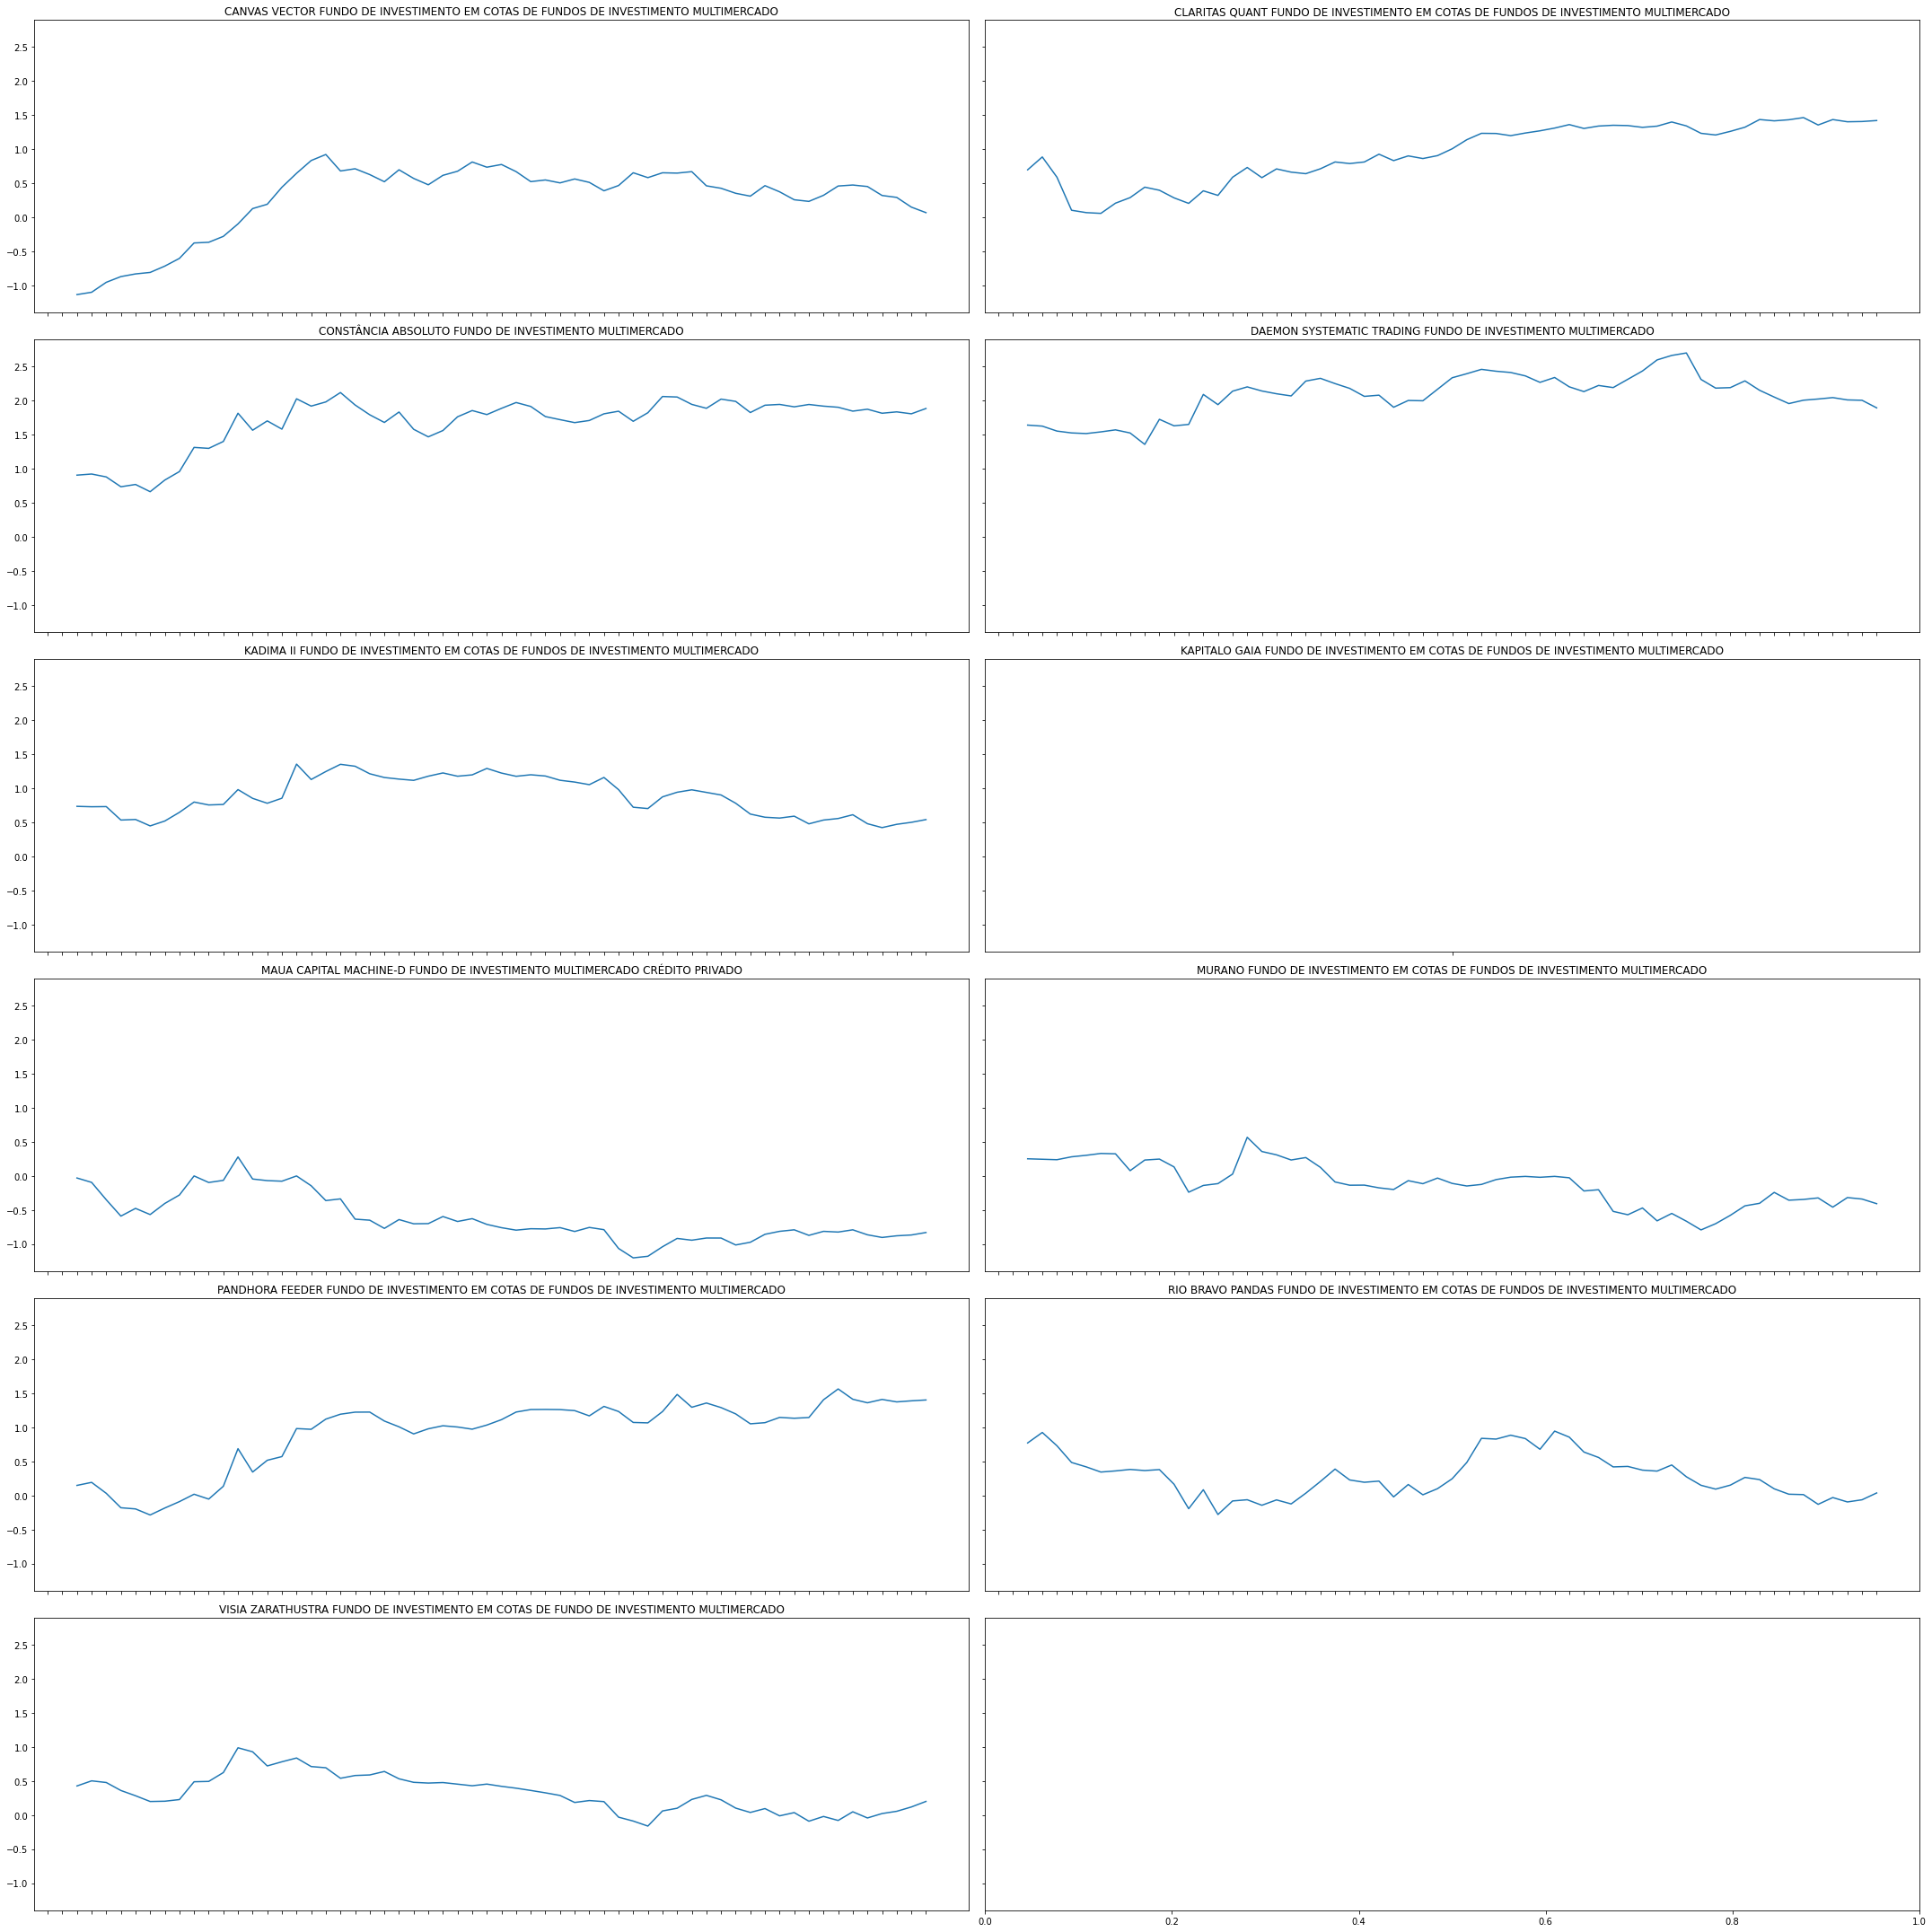

In [10]:
TIME_WINDOW = 252
grouped = funds.groupby('name') #Groups row by fund name

ncols=2 #Definition of the graph figure
nrows = int(np.ceil(grouped.ngroups/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,30),sharey=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()): #For each group/fund, we will have a subplot
    grp = grouped.get_group(key)
    grp['rolling'] =grp['log_returns'].rolling(window=TIME_WINDOW).apply(lambda x: TRADING_DAYS**0.5*np.mean(x)/(np.std(x)))
    #Compute the rolling estatistic and assign it to a column called rolling
    ax.plot(grp['date'], grp['rolling']) #Plot the rolling statistic
    ax.set_title(key)
    ax.set_xticklabels([])
plt.tight_layout()

One of the funds doesn't have enough historical data to plot rolling statistics with that time window, let's find out why

In [7]:
funds.groupby('name').count()

,date,share,log_returns
name,,,
CANVAS VECTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,310,310,310
CLARITAS QUANT FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,310,310,310
CONSTÂNCIA ABSOLUTO FUNDO DE INVESTIMENTO MULTIMERCADO,310,310,310
DAEMON SYSTEMATIC TRADING FUNDO DE INVESTIMENTO MULTIMERCADO,310,310,310
KADIMA II FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,310,310,310
KAPITALO GAIA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,247,247,247
MAUA CAPITAL MACHINE-D FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO,310,310,310
MURANO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,310,310,310
PANDHORA FEEDER FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,310,310,310


We can reduce the time window to 6 months in order to plot all funds. We can maintain a shared X axis to better compare the performance of the funds.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

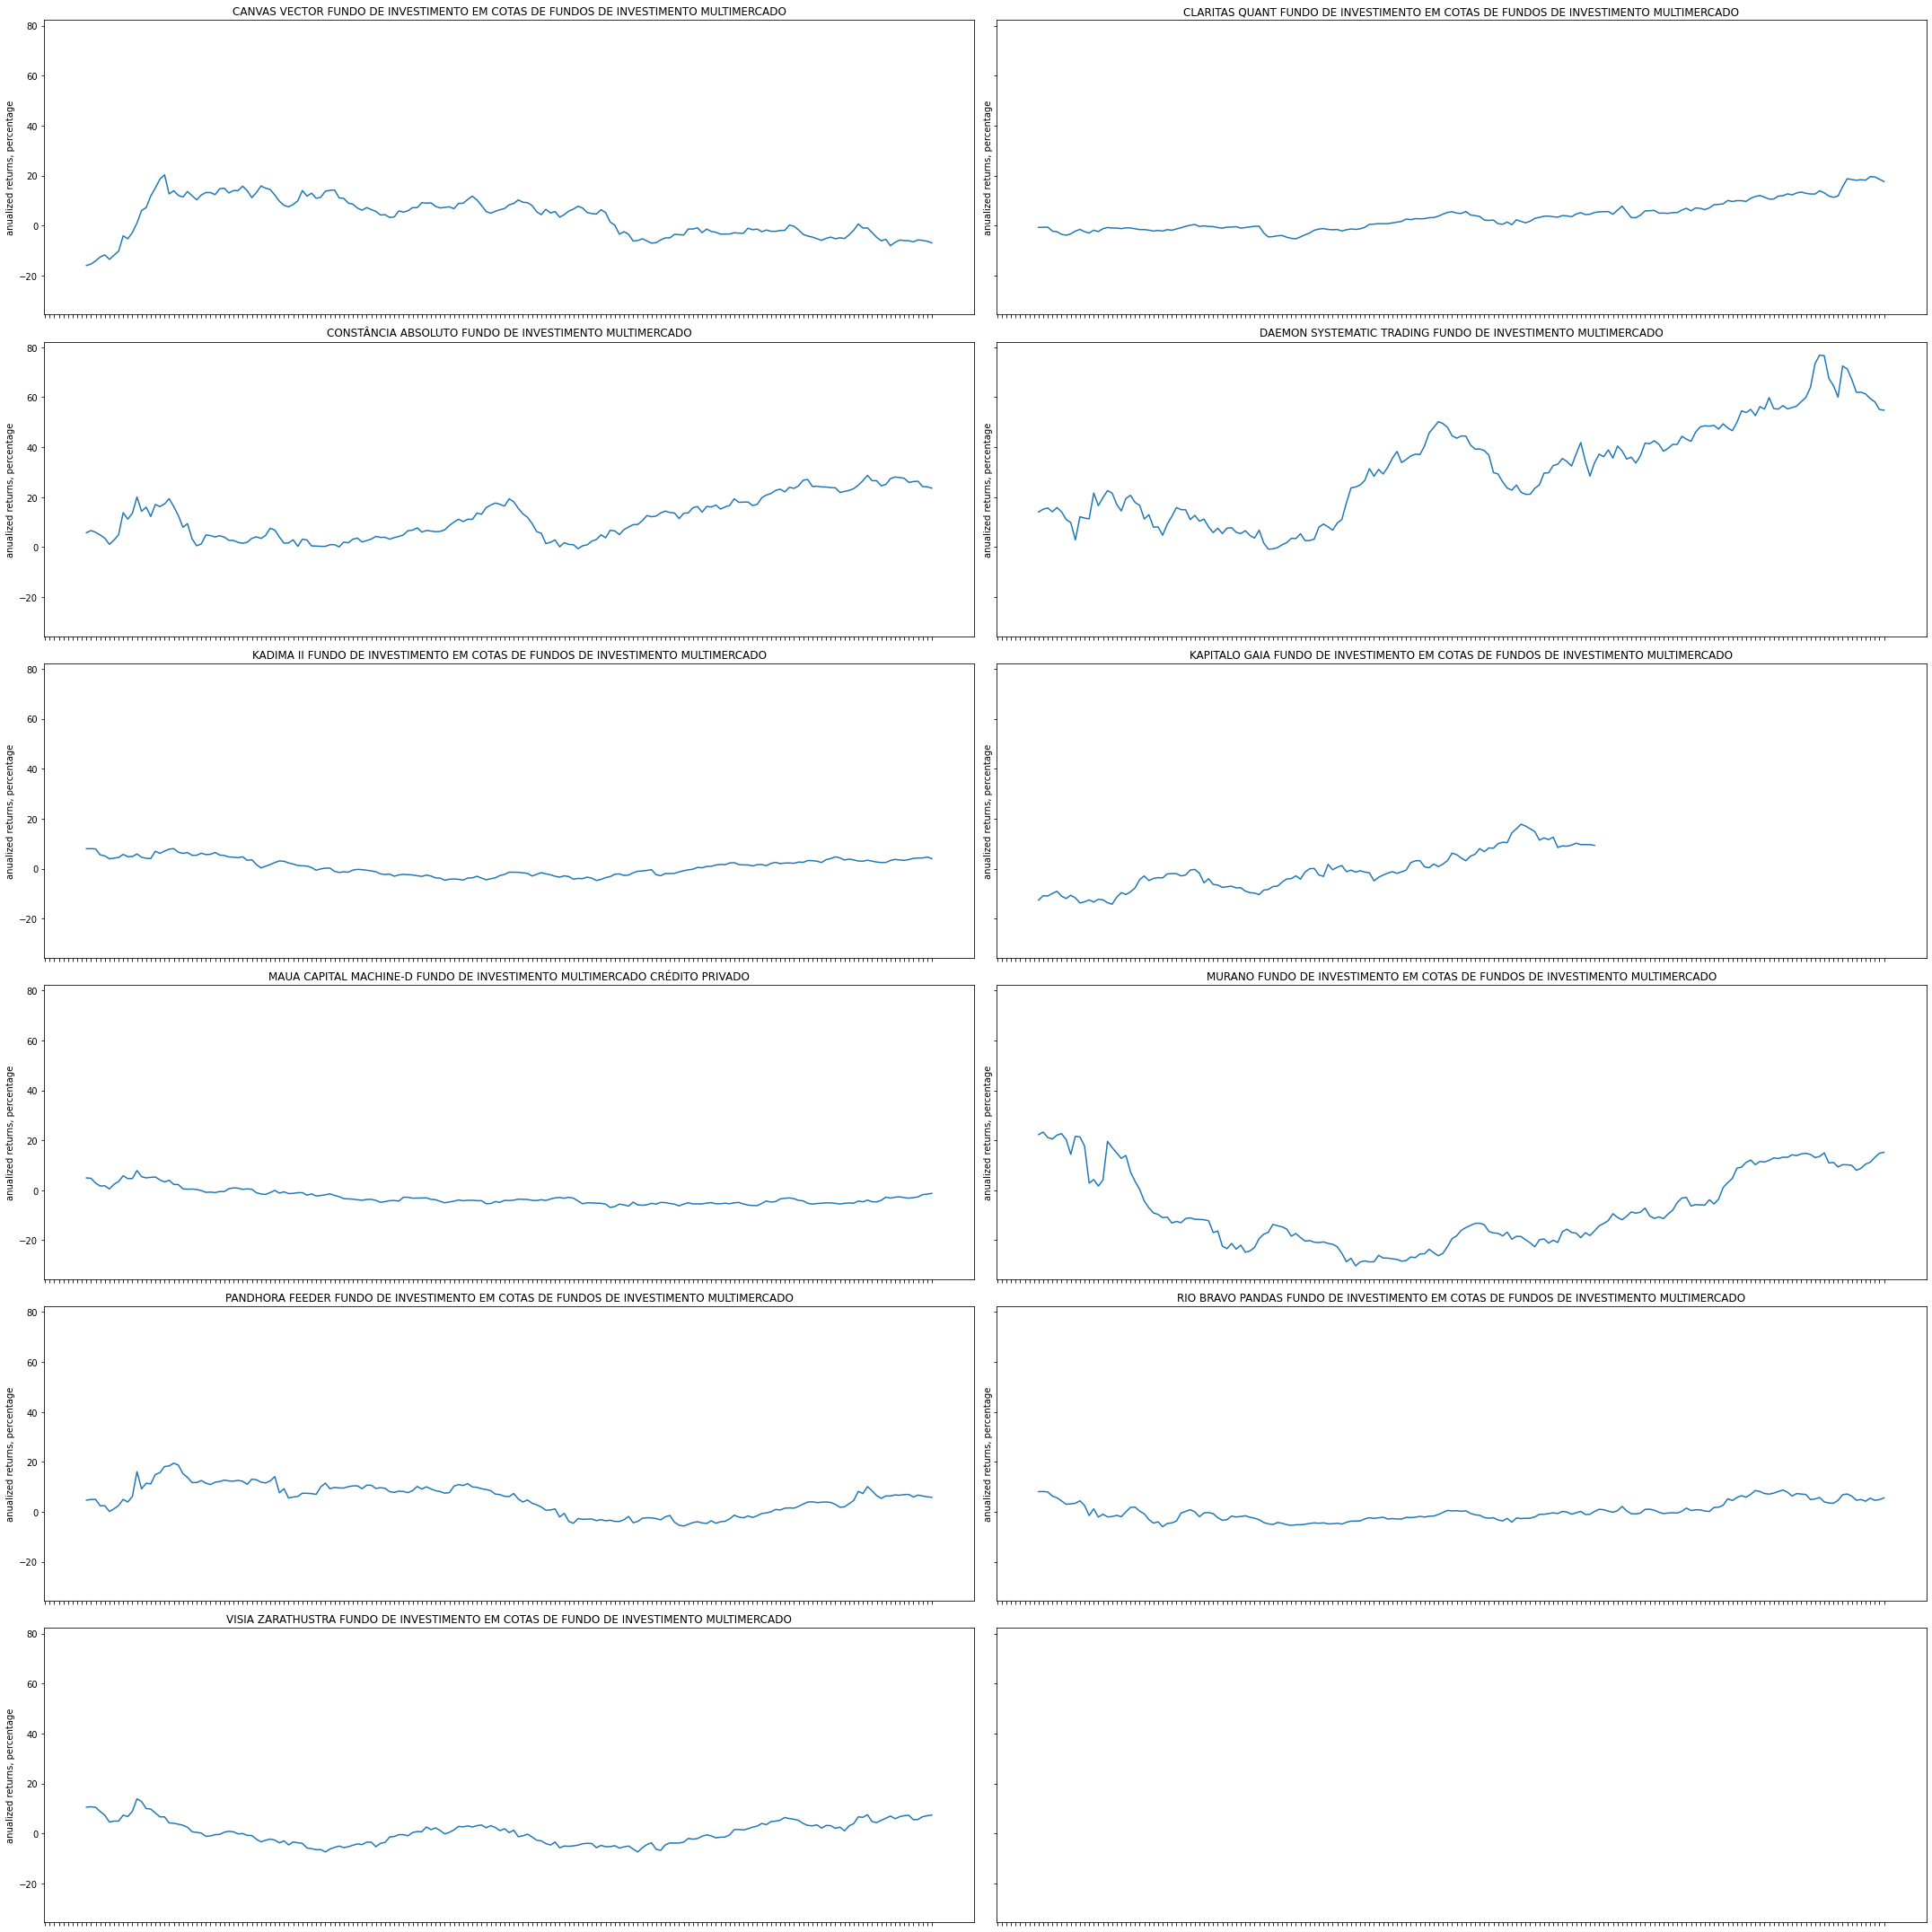

In [17]:
TIME_WINDOW = 252//2
grouped = funds.groupby('name') #Groups row by fund name

ncols=2 #Definition of the graph figure
nrows = int(np.ceil(grouped.ngroups/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,30),sharex=True,sharey=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()): #For each group/fund, we will have a subplot
    grp = grouped.get_group(key)
    grp['rolling'] =grp['log_returns'].rolling(window=TIME_WINDOW).apply(lambda x: (np.exp(x.mean()*TRADING_DAYS)-1)*100)
    #Compute the rolling estatistic and assign it to a column called rolling
    ax.plot(grp['date'], grp['rolling']) #Plot the rolling statistic
    ax.set_title(key)
    ax.set_xticklabels([])
    
    ax.set_ylabel('anualized returns, percentage')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

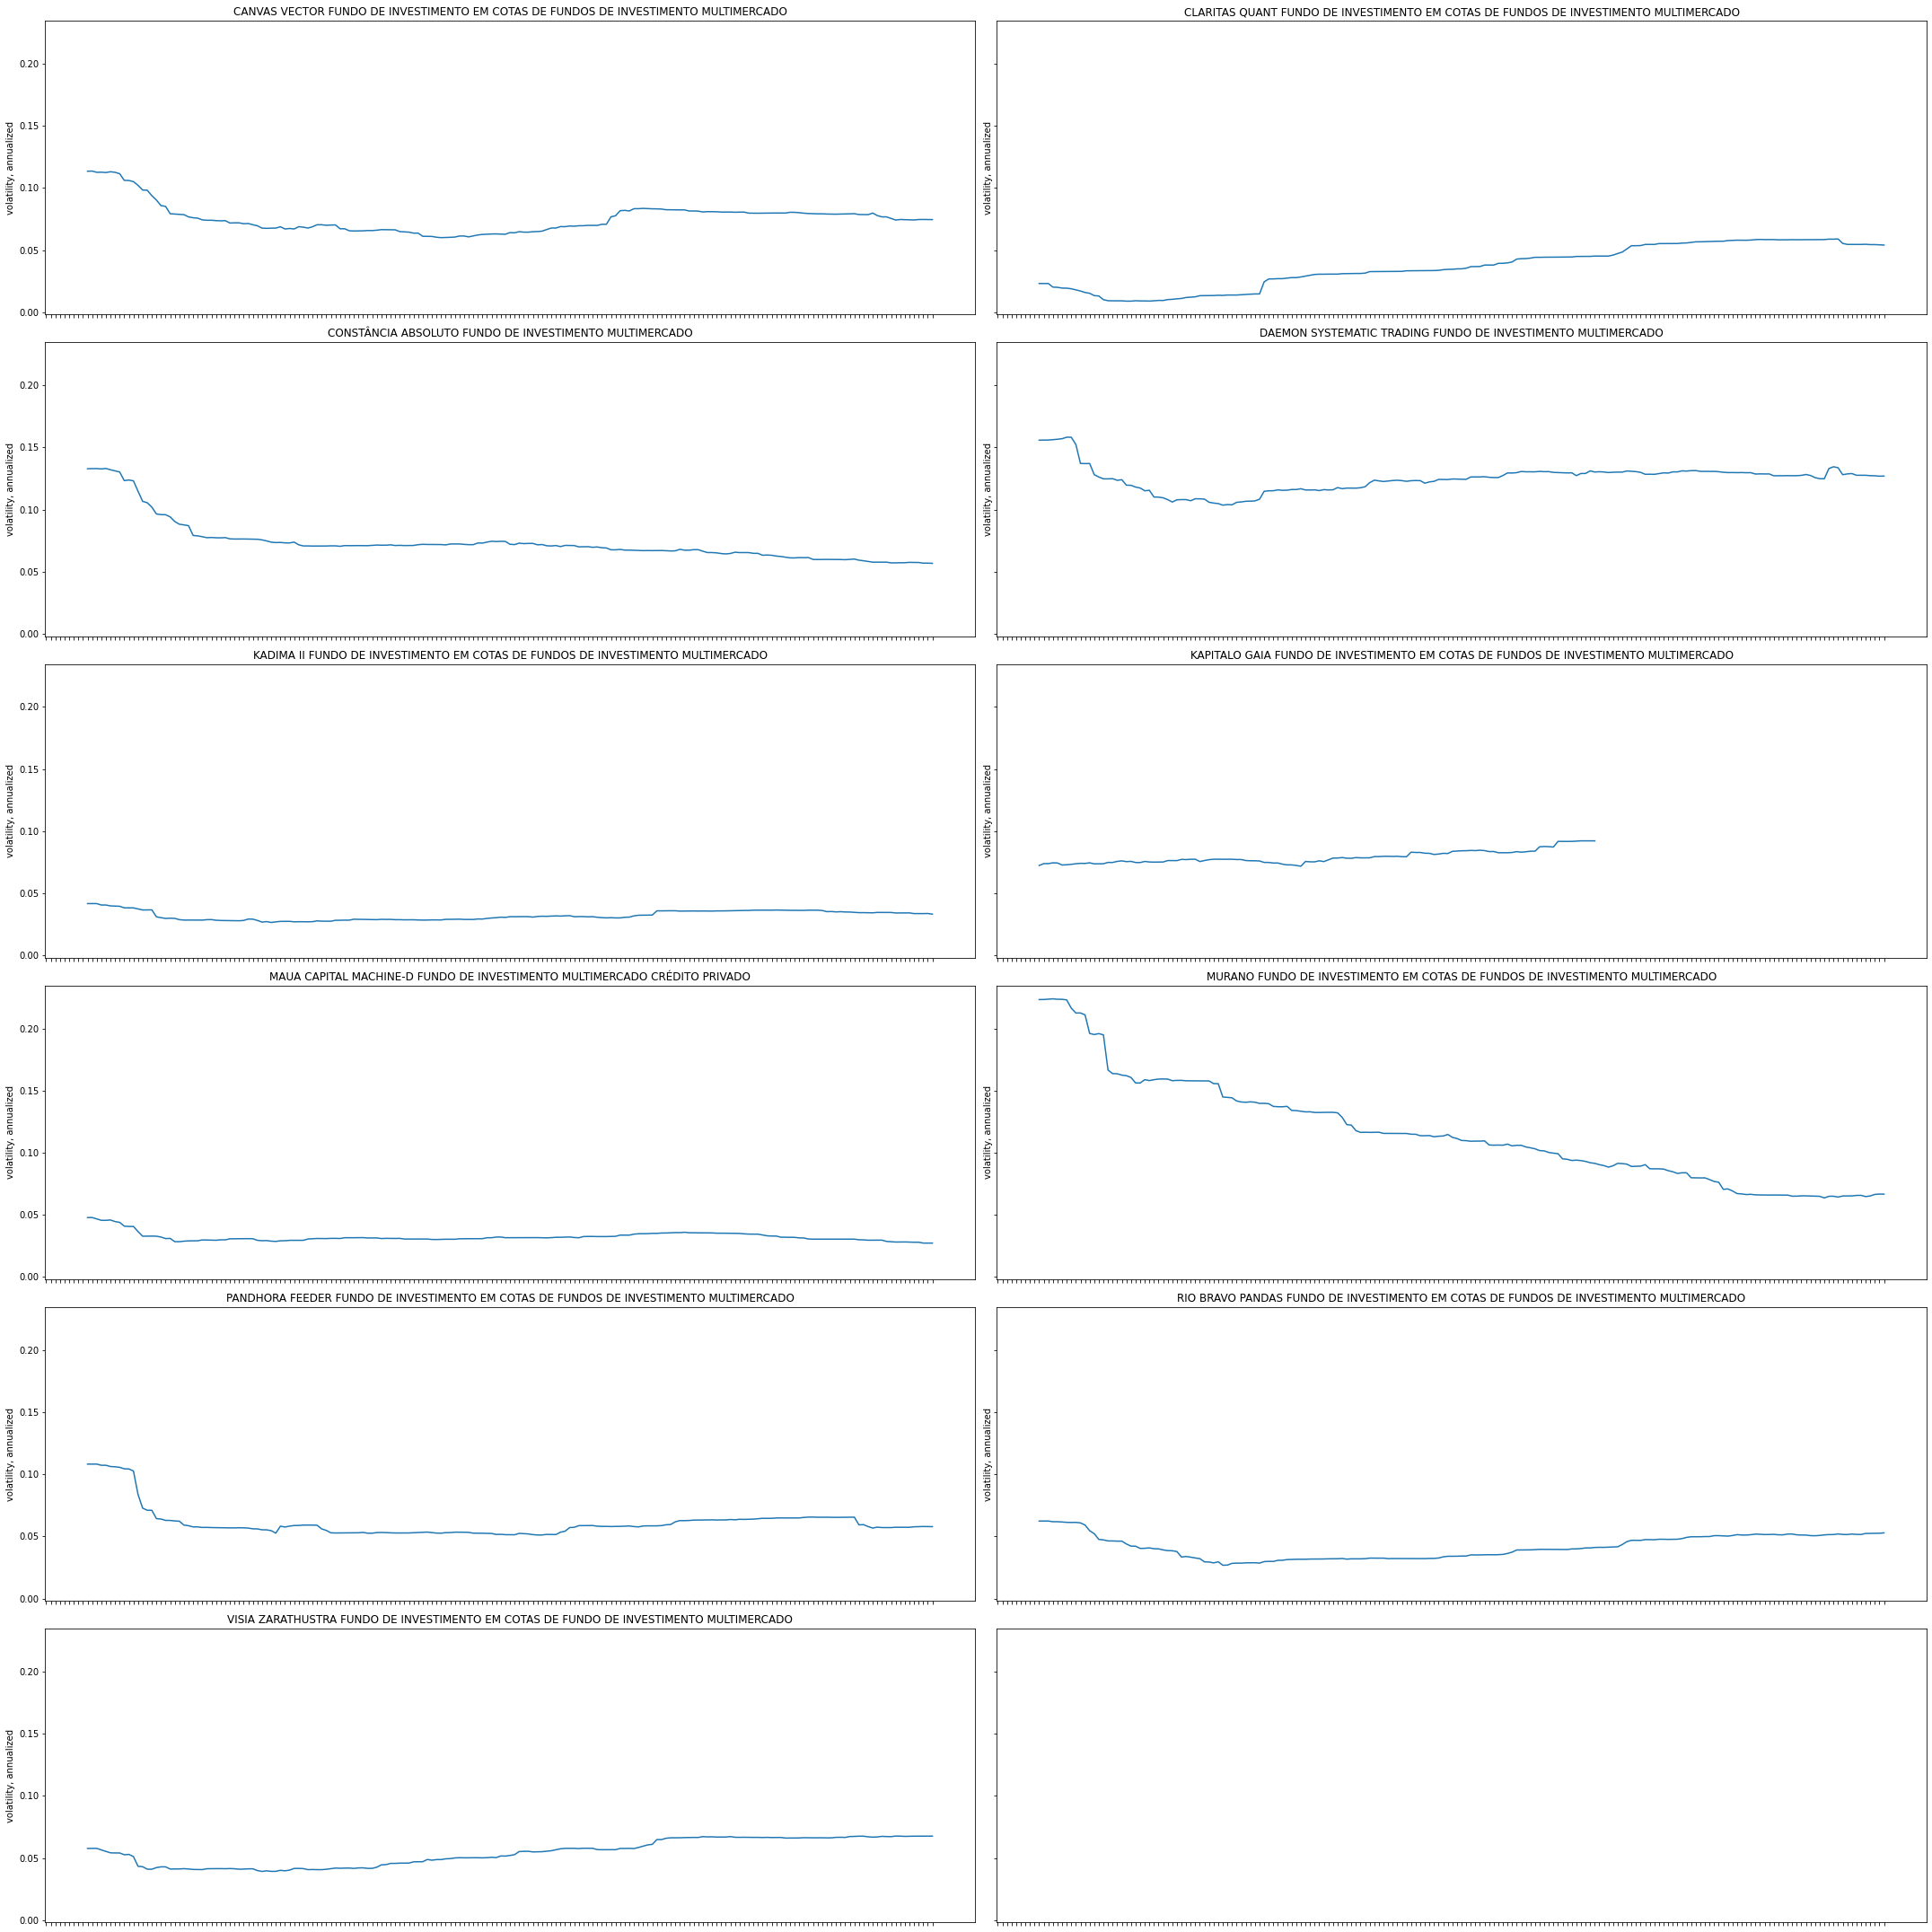

In [16]:
TIME_WINDOW = 252//2
grouped = funds.groupby('name') #Groups row by fund name

ncols=2 #Definition of the graph figure
nrows = int(np.ceil(grouped.ngroups/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,30),sharex=True,sharey=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()): #For each group/fund, we will have a subplot
    grp = grouped.get_group(key)
    grp['rolling'] =grp['log_returns'].rolling(window=TIME_WINDOW).apply(lambda x: np.std(x)*TRADING_DAYS**0.5)
    #Compute the rolling estatistic and assign it to a column called rolling
    ax.plot(grp['date'], grp['rolling']) #Plot the rolling statistic
    ax.set_title(key)
    ax.set_xticklabels([])
    
    ax.set_ylabel('volatility, annualized')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

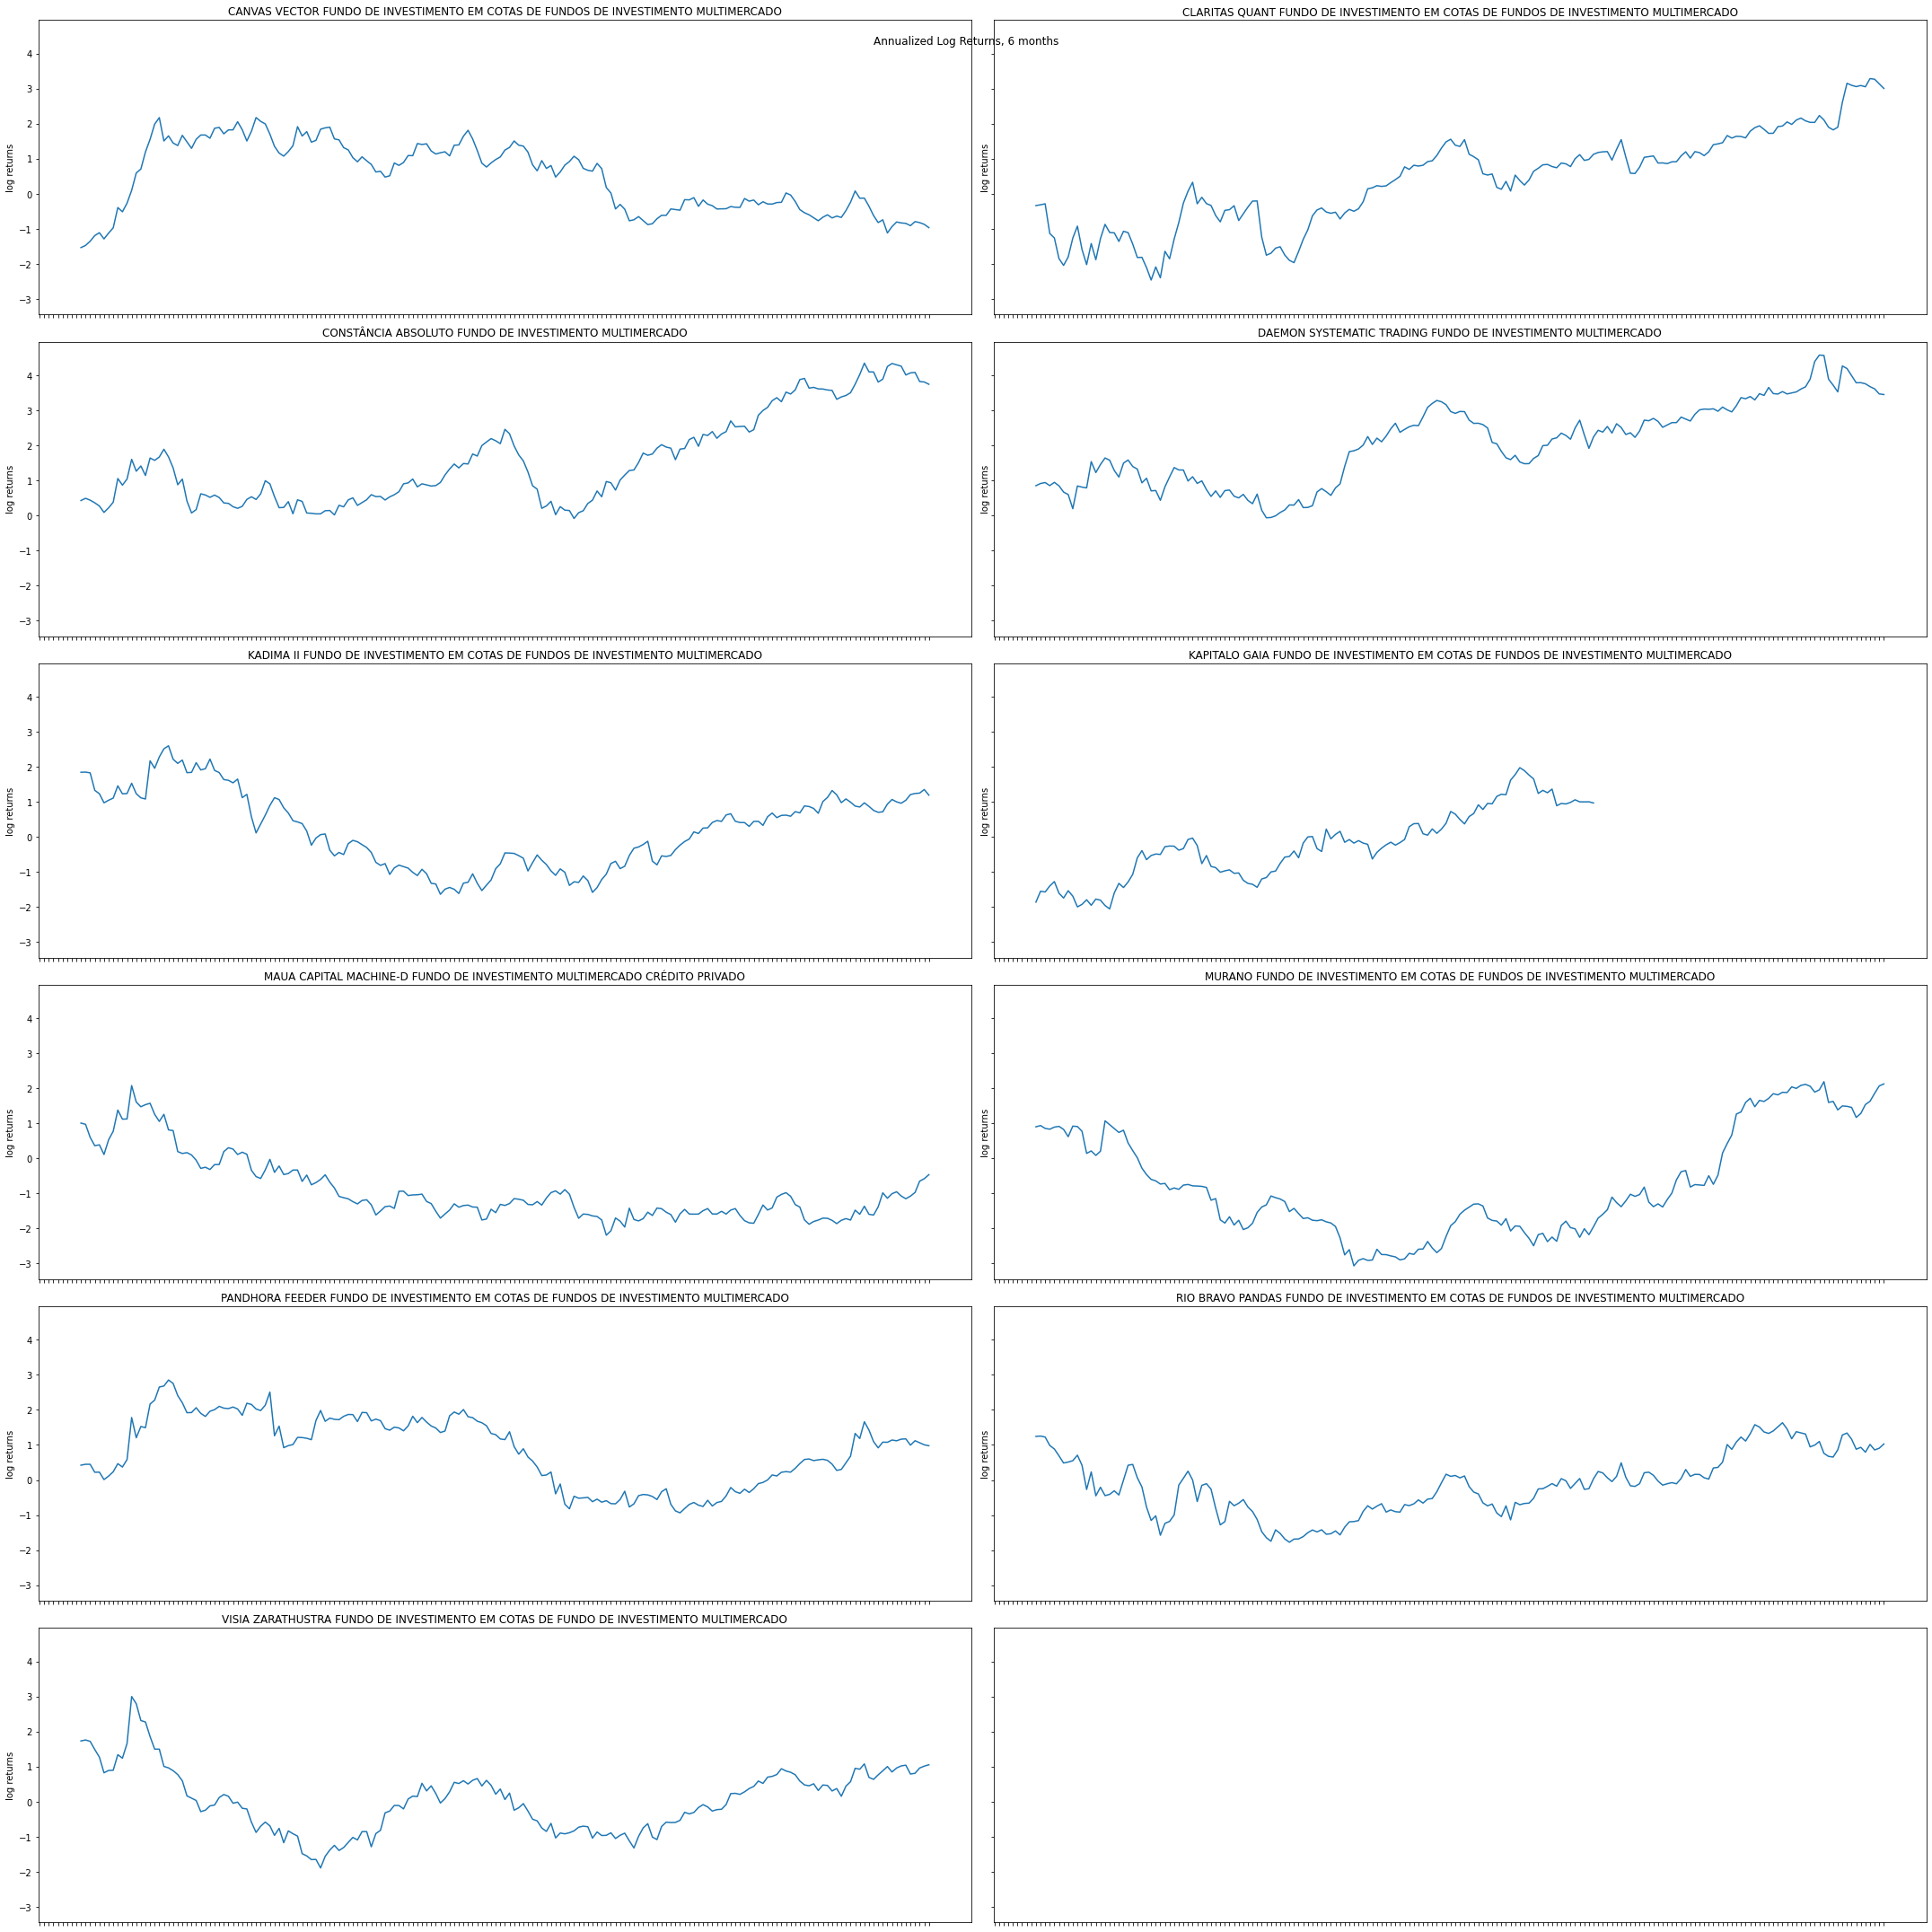

In [11]:
TIME_WINDOW = 252//2
grouped = funds.groupby('name') #Groups row by fund name

ncols=2 #Definition of the graph figure
nrows = int(np.ceil(grouped.ngroups/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,30),sharex=True,sharey=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()): #For each group/fund, we will have a subplot
    grp = grouped.get_group(key)
    grp['rolling'] =grp['log_returns'].rolling(window=TIME_WINDOW).apply(lambda x: TRADING_DAYS**0.5*np.mean(x)/(np.std(x)))
    #Compute the rolling estatistic and assign it to a column called rolling
    ax.plot(grp['date'], grp['rolling']) #Plot the rolling statistic
    ax.set_title(key)
    ax.set_xticklabels([])
    
    ax.set_ylabel('sharpe ratio')
plt.tight_layout()

#Problem 2: Portfolio Rebalance


Since we have the log returns, we can simply add the log returns of each stock for the 10 first days and then exponentiate to retrieve the total return of the 10 first days.

We can multiply the total return by the initial deltas to find out the current deltas at 10 days.

In [ ]:
first_deltas = np.array([0.1,0.15,0.1,0.05,0.05,0.1,0.2,0.1,0.05,0.1] )
logreturns = pd.read_csv('logreturns.csv')
logreturns.drop('DATE',1,inplace=True)
#dropped the date column because it doesn't add extra information 
#and math will be smoother without it

In [ ]:
ten_days = logreturns.iloc[:10,:] #Select all of the columns for rows 0-9
ten_days_return = ten_days.sum(axis=0) #Computes the sum for each column
ten_days_return = np.exp(ten_days_return.values)
print(ten_days_return)

[0.97063576 1.21020528 0.75494151 1.09184508 1.02844402 1.07691449
 1.02721165 1.07332574 1.03600399 0.85908707]


In [ ]:
ten_days_delta = np.multiply(first_deltas,ten_days_return) #Compute the updated deltas
print(ten_days_delta)

[0.09706358 0.18153079 0.07549415 0.05459225 0.0514222  0.10769145
 0.20544233 0.10733257 0.0518002  0.08590871]


In [ ]:
ten_days_desired = np.array([0.2,0.1, 0.1, 0.1, 0.05, 0.1, 0.05, 0.2, 0.05, 0.05])
trades = ten_days_desired - ten_days_delta
print(trades)

[ 0.10293642 -0.08153079  0.02450585  0.04540775 -0.0014222  -0.00769145
 -0.15544233  0.09266743 -0.0018002  -0.03590871]


For the returns of the final days, we can again sum the log returns but this time weight them based on the deltas obtained by rebalancing the portfolio.

In order to get the total returns of the portfolio, we must sum the log returns of the first and second portfolio respectively weighted by their deltas. 

The total sum can be exponentiated and multiplied by 100 to obtain the total real return in percentage points.

In [ ]:
ten_days = logreturns.iloc[:10,:] #Select all of the columns for rows 0-9
ten_days_return = ten_days.sum(axis=0) #Computes the sum for each column
final_days = logreturns.iloc[10:,:] #Select all of the columns for rows 10-14
final_days_return = final_days.sum(axis=0) #Computes the sum for each column

ten_days_total_return = np.dot(ten_days_return,first_deltas) #dot product is equivalent to a weighted sum
final_days_total_return = np.dot(final_days_return,ten_days_desired)
total_return = (np.exp(ten_days_total_return + final_days_total_return) -1)*100
print("Portfolio Return in percentage points:")
print(total_return)

0.054604903052246634


#Problem 3: Web Scraping and Estimation



In [40]:
from bs4 import BeautifulSoup

import requests
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
#headers are needed or the access would be denied
html = requests.get("https://www.investing.com/equities/barrick-gold-corp.-historical-data",headers=headers).content
#storing a get request
soup = BeautifulSoup(html, 'html.parser') #parsing the request with beautifulsoup

In [42]:
prices = soup.find_all('td', class_=["redFont", "greenFont"],attrs={"data-real-value": True})
#These are the attributes of the html element that holds the price
for price in prices:
    print(price.text) #The text corresponds to the price we want

23.24
23.23
23.71
23.01
23.12
23.41
23.46
23.21
24.17
24.26
24.08
23.86
24.58
24.58
24.68
24.70
24.81
24.59
25.11
25.27
24.02


I wasn't able to build a crawler in time due to the interaction with javascript objects needed to display the desired data. I was able to build a scraper that got the prices of a given investing.com webpage.

I downloaded the historical data manually using the "Download Data" feature of the website. The following estimation will be done with the downloaded csvs.

TODO: web scraper

In [8]:
copper = pd.read_csv('Copper Futures Historical Data.csv')
barrick = pd.read_csv('GOLD Historical Data.csv')
gold = pd.read_csv('Gold Futures Historical Data.csv', thousands=',')

In [9]:
copper.drop(['Open','High','Low','Vol.','Change %'],axis=1,inplace=True) #Dropping unnecessary columns
barrick.drop(['Open','High','Low','Vol.','Change %'],axis=1,inplace=True)
gold.drop(['Open','High','Low','Vol.','Change %'],axis=1,inplace=True)

In [10]:
df=copper.set_index('Date').join(gold.set_index('Date'),lsuffix='_copper', how = 'inner', rsuffix='_gold')
#Joining the copper and gold datasets using the date as index

In [11]:
df=df.join(barrick.set_index('Date'),how='inner',rsuffix='_barrick') #Inner join to remove missing dates

In [34]:
X,y = np.array(df.iloc[:,:-1]), np.array(df.iloc[:,-1]) #Separating the columns into np arrays for the regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y) #Fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(X)

In [13]:
regressor.score(X,y) #R squared of the regressor

0.8359263241807664

In [14]:
regressor.coef_ #Coefficients, left is copper and right is gold

array([-1.90447994,  0.02398571])

In [15]:
regressor.intercept_ #Intercept

-13.283783090223842

Analyzing the coefficients doesn't tell us if the copper or gold price is more important since they are on different scales.

But it indicates the sign of the relationship, that an increase in gold prices lead to an increase in GOLD US Equity and that a decrease in copper prices lead to an increase in GOLD US Equity.

Now let's analyze the residuals to see if the linear model is a good fit.

In [21]:
import seaborn as sns
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Residual plot')

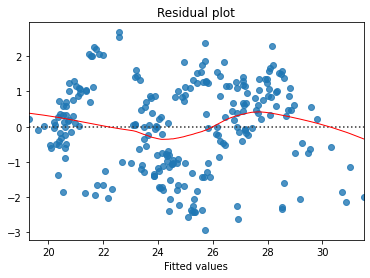

In [28]:
predictions = regressor.predict(X)
sns.residplot(x=predictions.reshape(-1), y=y,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

The Residual Plot seems okay, there are some tendencies that could be a sign of non-linearity but they are small

Text(0.5, 1.0, 'Normal Q-Q Plot')

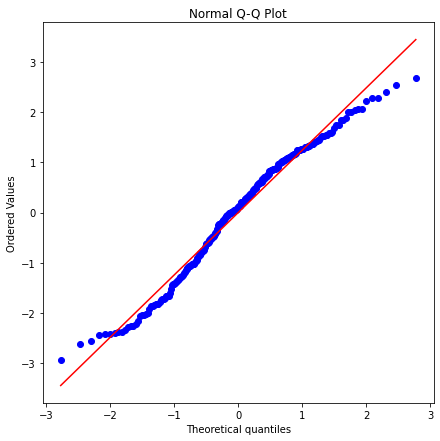

In [29]:
residuals = y - predictions.reshape(-1)
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

The residuals seem to adhere well to a normal distribution, which is one of the assumptions made when interpreting a linear regression

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Fitted value')

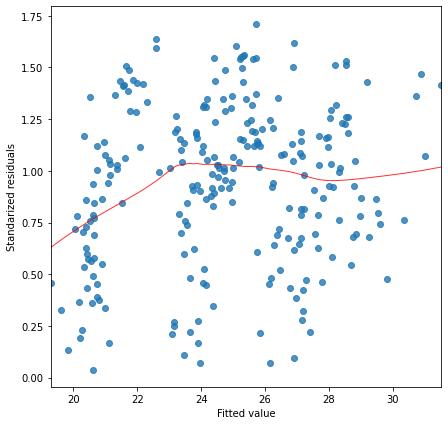

In [30]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(predictions.reshape(-1), model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

The residuals show some signs of heteroscedasticity (unequal variance) for the first values, but they are minor. We can continue assuming equal variance of the residuals and compute the p-values of the coefficients.

This time we'll standardize the gold and copper prices in order to know the relative importance of each one.

In [35]:
from sklearn import preprocessing
X_standardized = preprocessing.StandardScaler().fit_transform(X)

In [ ]:
print(X_standardized)

In [38]:
import statsmodels.api as sm
X_standardized = sm.add_constant(X_standardized) #adding a constant term needed by this library
logit_model=sm.OLS(y,X_standardized)
result=logit_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     631.8
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           4.62e-98
Time:                        14:42:17   Log-Likelihood:                -410.35
No. Observations:                 251   AIC:                             826.7
Df Residuals:                     248   BIC:                             837.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7240      0.079    313.742      0.0

In [39]:
print(result.pvalues)

[0.00000000e+00 1.14493088e-27 1.41580343e-60]


The p-values are very low, and if we were testing the hypothesis of the 1st coefficient being negative and the second being positive, we would be able to reject the null hypothesis with all usual alphas.

By standardizing the prices, we can see that the price of gold is twice as important as the copper price. The copper price has a negative influence, and the gold price has a positive influence.